# **AI_CA5_Phase2**

### Ali Pakdel Samadi
### 810198368

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import string
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.utils import *
from functools import partial

## **Phase 1: Preprocessing**

**1.**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CA5/A_Z Handwritten Data.csv", dtype='uint8')
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


**2.**

In [4]:
labels = pd.DataFrame(columns = ['label'])
labels['label'] = df['0']
for i in range(len(labels['label'])):
    labels['label'][i] = chr(labels['label'][i] + 65)
display(labels)

,label
0,A
1,A
2,A
3,A
4,A
...,...
372445,Z
372446,Z
372447,Z
372448,Z


In [5]:
df.drop('0', inplace=True, axis=1)
df.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


**3.**

In [7]:
reshaped_data = pd.DataFrame(columns=['image'])
img = []
for index in range(0, df.shape[0]):
    array = np.array(df.iloc[index], dtype=np.uint8)
    array = np.reshape(array, (28, 28))
    img.append(array)

reshaped_data['image'] = img

In [8]:
reshaped_data.head()

,image
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


**4.**

In [9]:
print("Number of images in data:", df.shape[0])
print("Number of classes:", labels['label'].nunique())

Number of images in data: 372450
Number of classes: 26


 **5.**

Number of images in each class: 
A    13869
B     8668
C    23409
D    10134
E    11440
F     1163
G     5762
H     7218
I     1120
J     8493
K     5603
L    11586
M    12336
N    19010
O    57825
P    19341
Q     5812
R    11566
S    48419
T    22495
U    29008
V     4182
W    10784
X     6272
Y    10859
Z     6076
Name: label, dtype: int64


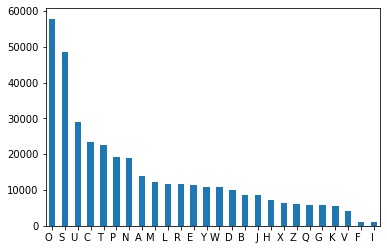

In [10]:
print("Number of images in each class: ")
print(labels['label'].value_counts(sort = False))

count_train = labels['label'].value_counts(sort=True)
count_train.plot.bar()
plt.xticks(rotation=0, ha='right')
plt.show()

**6.**

Image of class A


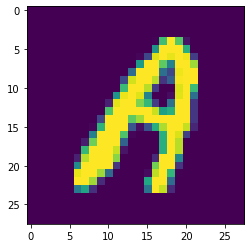

Image of class B


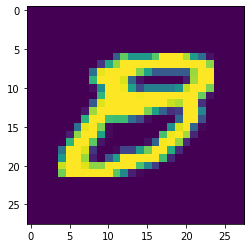

Image of class C


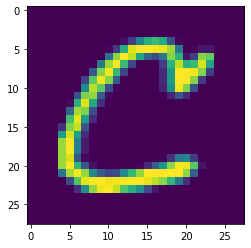

Image of class D


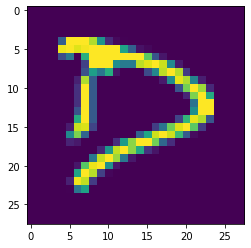

Image of class E


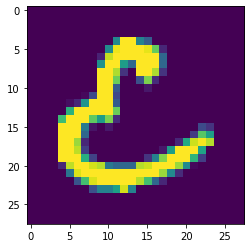

Image of class F


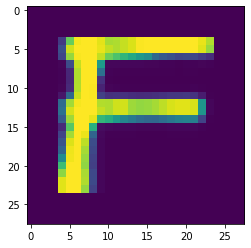

Image of class G


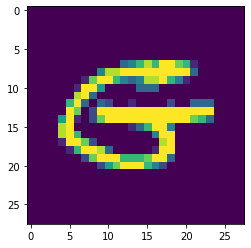

Image of class H


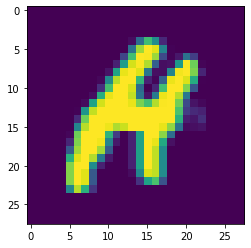

Image of class I


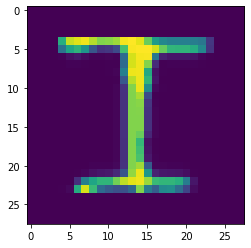

Image of class J


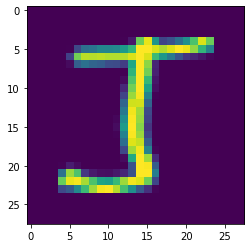

Image of class K


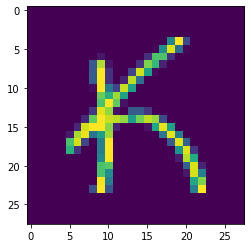

Image of class L


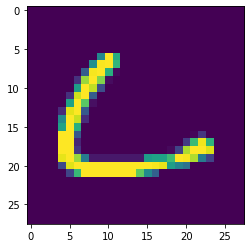

Image of class M


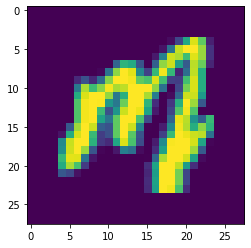

Image of class N


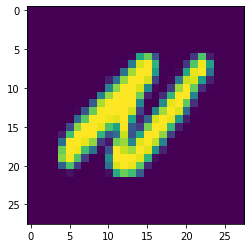

Image of class O


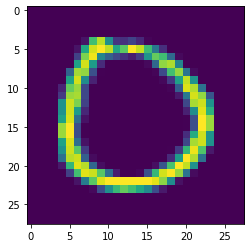

Image of class P


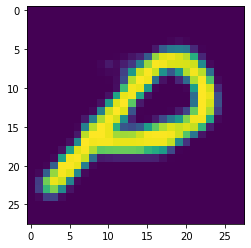

Image of class Q


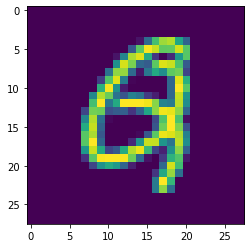

Image of class R


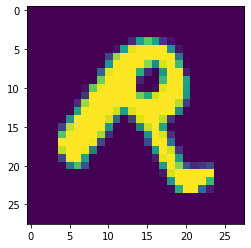

Image of class S


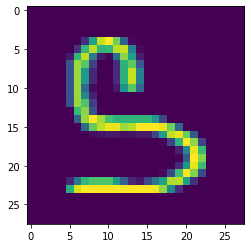

Image of class T


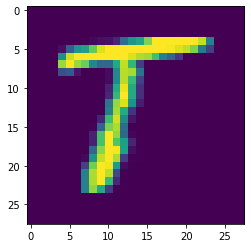

Image of class U


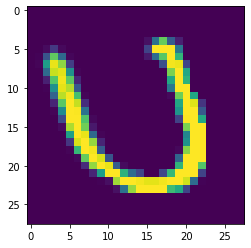

Image of class V


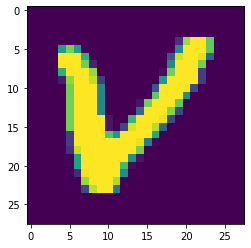

Image of class W


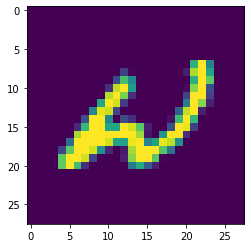

Image of class X


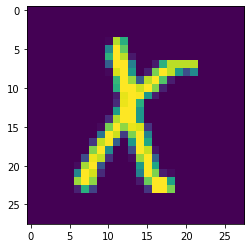

Image of class Y


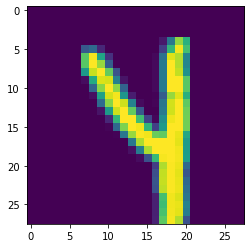

Image of class Z


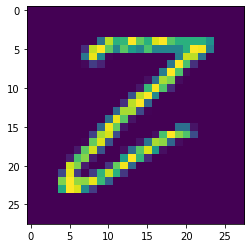

In [12]:
letters = sorted(labels['label'].unique())

for char in letters:
    print('Image of class', char)
    index = labels['label'].loc[lambda x: x==char].index
    plt.imshow(reshaped_data['image'].iloc[index[0]])
    plt.show()

In [6]:
onehot_labels = pd.get_dummies(labels)

**7.**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df, onehot_labels, test_size=0.2, random_state=42)

display(x_train)
display(y_train)
display(x_test)
display(y_test)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
20675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label_A,label_B,label_C,label_D,label_E,label_F,label_G,label_H,label_I,label_J,...,label_Q,label_R,label_S,label_T,label_U,label_V,label_W,label_X,label_Y,label_Z
20675,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234698,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21507,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270540,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
248793,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
365838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
114871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label_A,label_B,label_C,label_D,label_E,label_F,label_G,label_H,label_I,label_J,...,label_Q,label_R,label_S,label_T,label_U,label_V,label_W,label_X,label_Y,label_Z
114871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270469,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
27001,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90200,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
117835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**8.**

In [15]:
onehot_labels = pd.get_dummies(labels)

## **Phase 2: Implementing Neural Network**

In [8]:
def acc_loss_plot(log):
    f = plt.figure()    
    f, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,10))
    axes[0].plot(log.history['accuracy'])
    axes[0].plot(log.history['val_accuracy'])
    axes[0].legend(['train', 'test'])
    axes[0].set_title("accuracy")
    axes[0].set(xlabel='epochs')

    axes[1].plot(log.history['loss'])
    axes[1].plot(log.history['val_loss'])
    axes[1].legend(['train', 'test'])
    axes[1].set_title("loss")
    axes[1].set(xlabel='epochs')
    del f
    del axes

In [9]:
def criterion_report(x, y):
    y_predict = model.predict(x, verbose = 1)
    y_predict = np.argmax(y_predict, axis = 1)

    y_true = np.argmax(y, axis=1)

    print(classification_report(y_true, y_predict))
    del y_predict
    del y_true

In [10]:
LEARNING_RATE = 0.01
EPOCHS = 10
MOMENTUM = 0
BATCH_SIZE = 32
INPUT_DIM = 28 * 28
RELU = 'relu'
SIGIMOID = 'sigimoid'
TANH = 'tanh'
SOFTMAX = 'softmax'

In [21]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM, nesterov=False, name='SGD')

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(26, activation=SOFTMAX)
])

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## **Phase 3: Data Classification**

In [26]:
rescaled_x_train = x_train.div(255)
rescaled_x_test = x_test.div(255)

In [11]:
xx_train = rescaled_x_train.to_numpy()
yy_train = y_train.to_numpy()
xx_test = rescaled_x_test.to_numpy()
yy_test = y_test.to_numpy()

In [22]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.8306 - accuracy: 0.7726 - val_loss: 0.4751 - val_accuracy: 0.8714
Epoch 2/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.4036 - accuracy: 0.8901 - val_loss: 0.3513 - val_accuracy: 0.9026
Epoch 3/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.3159 - accuracy: 0.9138 - val_loss: 0.2900 - val_accuracy: 0.9216
Epoch 4/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2712 - accuracy: 0.9257 - val_loss: 0.2805 - val_accuracy: 0.9228
Epoch 5/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.2449 - accuracy: 0.9327 - val_loss: 0.2452 - val_accuracy: 0.9330
Epoch 6/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.2270 - accuracy: 0.9375 - val_loss: 0.2269 - val_accuracy: 0.9381
Epoch 7/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2134 - accuracy: 0.9410 - val_loss: 0.2175 - val_ac

<Figure size 432x288 with 0 Axes>

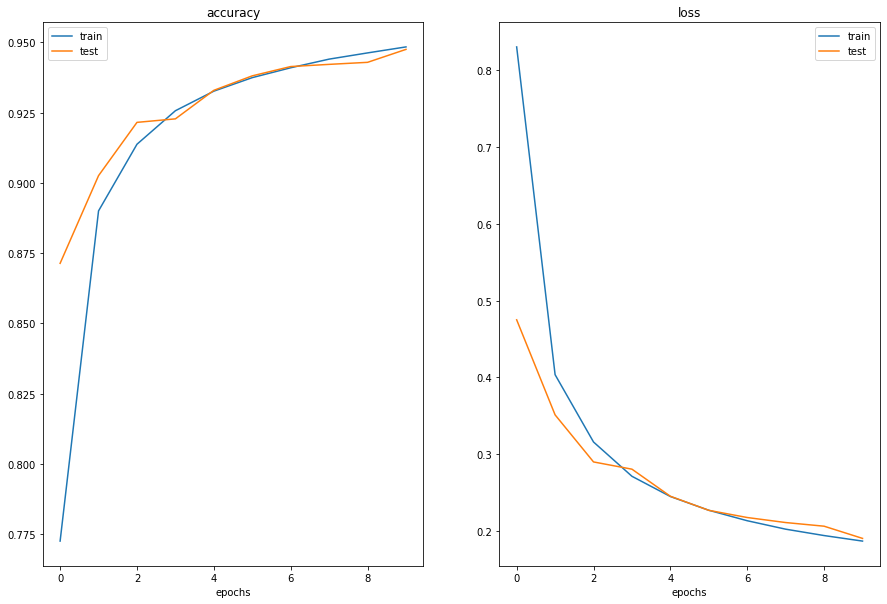

In [23]:
acc_loss_plot(log)

In [24]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

9312/9312 [==============================] - 11s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11063
           1       0.94      0.89      0.91      6995
           2       0.96      0.97      0.96     18667
           3       0.92      0.87      0.90      8090
           4       0.93      0.92      0.92      9226
           5       0.91      0.87      0.89       932
           6       0.91      0.89      0.90      4579
           7       0.88      0.88      0.88      5752
           8       0.97      0.83      0.90       883
           9       0.93      0.92      0.92      6825
          10       0.88      0.85      0.87      4471
          11       0.96      0.97      0.96      9267
          12       0.94      0.96      0.95      9849
          13       0.93      0.94      0.94     15254
          14       0.97      0.98      0.98     46196
          15       0.96      0.97      0.97     15473
       

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                23550     
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 26)                806       
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trainable params: 0
_________________________________________________________________


In [26]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM, nesterov=False, name='SGD')

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=partial(tf.nn.leaky_relu, alpha=0.01)),
    tf.keras.layers.Dense(30, activation=partial(tf.nn.leaky_relu, alpha=0.01)),
    tf.keras.layers.Dense(26, activation=SOFTMAX)
])

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/10
9312/9312 [==============================] - 19s 2ms/step - loss: 0.8026 - accuracy: 0.7797 - val_loss: 0.4890 - val_accuracy: 0.8645
Epoch 2/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.4096 - accuracy: 0.8883 - val_loss: 0.3553 - val_accuracy: 0.9047
Epoch 3/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.3199 - accuracy: 0.9130 - val_loss: 0.2985 - val_accuracy: 0.9188
Epoch 4/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2728 - accuracy: 0.9255 - val_loss: 0.2616 - val_accuracy: 0.9289
Epoch 5/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2444 - accuracy: 0.9328 - val_loss: 0.2407 - val_accuracy: 0.9339
Epoch 6/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.2256 - accuracy: 0.9380 - val_loss: 0.2255 - val_accuracy: 0.9391
Epoch 7/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2116 - accuracy: 0.9421 - val_loss: 0.2168 - val_ac

<Figure size 432x288 with 0 Axes>

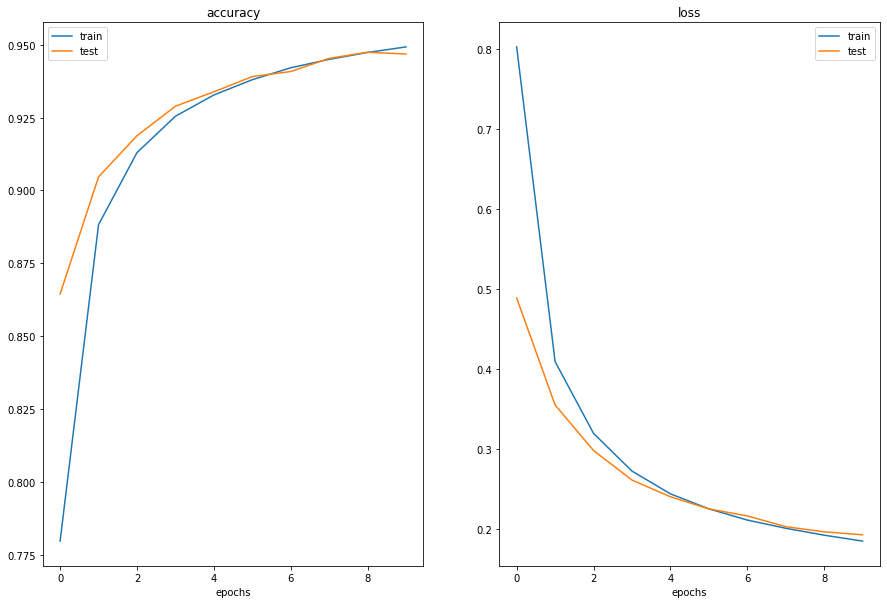

In [28]:
acc_loss_plot(log)

In [29]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

9312/9312 [==============================] - 11s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11063
           1       0.94      0.89      0.91      6995
           2       0.98      0.95      0.96     18667
           3       0.95      0.84      0.89      8090
           4       0.92      0.92      0.92      9226
           5       0.91      0.93      0.92       932
           6       0.89      0.90      0.90      4579
           7       0.94      0.88      0.91      5752
           8       0.92      0.87      0.89       883
           9       0.92      0.92      0.92      6825
          10       0.88      0.90      0.89      4471
          11       0.95      0.97      0.96      9267
          12       0.95      0.94      0.94      9849
          13       0.92      0.94      0.93     15254
          14       0.96      0.99      0.97     46196
          15       0.96      0.97      0.97     15473
       

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                23550     
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 26)                806       
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trainable params: 0
_________________________________________________________________


## **Investigate the impact of offending changes and questions**

### **First Section) Impact of Optimizer:**

In [31]:
MOMENTUM = 0.5

In [32]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM, nesterov=False, name='SGD')

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(26, activation=SOFTMAX)
])

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.6608 - accuracy: 0.8169 - val_loss: 0.3764 - val_accuracy: 0.8985
Epoch 2/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.3363 - accuracy: 0.9086 - val_loss: 0.2924 - val_accuracy: 0.9208
Epoch 3/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2732 - accuracy: 0.9254 - val_loss: 0.2716 - val_accuracy: 0.9247
Epoch 4/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2393 - accuracy: 0.9349 - val_loss: 0.2457 - val_accuracy: 0.9330
Epoch 5/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2175 - accuracy: 0.9406 - val_loss: 0.2126 - val_accuracy: 0.9418
Epoch 6/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2019 - accuracy: 0.9446 - val_loss: 0.1962 - val_accuracy: 0.9474
Epoch 7/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.1902 - accuracy: 0.9476 - val_loss: 0.1996 - val_ac

<Figure size 432x288 with 0 Axes>

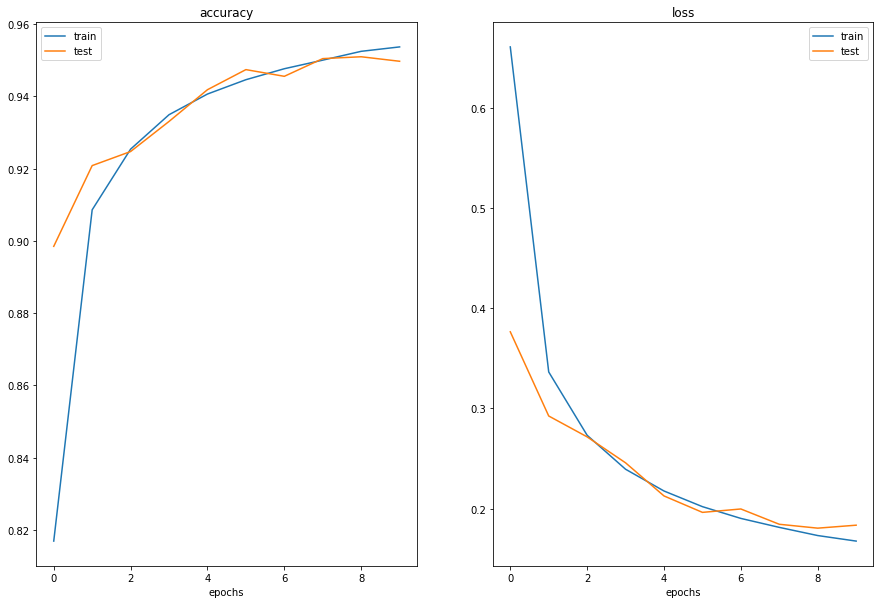

In [34]:
acc_loss_plot(log)

In [35]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

9312/9312 [==============================] - 13s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11063
           1       0.95      0.90      0.92      6995
           2       0.96      0.97      0.97     18667
           3       0.94      0.86      0.90      8090
           4       0.96      0.92      0.94      9226
           5       0.94      0.87      0.91       932
           6       0.88      0.94      0.91      4579
           7       0.95      0.84      0.89      5752
           8       0.89      0.92      0.90       883
           9       0.94      0.92      0.93      6825
          10       0.93      0.83      0.88      4471
          11       0.96      0.97      0.96      9267
          12       0.95      0.95      0.95      9849
          13       0.94      0.94      0.94     15254
          14       0.96      0.99      0.97     46196
          15       0.94      0.98      0.96     15473
       

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                23550     
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dense_11 (Dense)            (None, 26)                806       
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trainable params: 0
_________________________________________________________________


In [37]:
MOMENTUM = 0.9

In [38]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM, nesterov=False, name='SGD')

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(26, activation=SOFTMAX)
])

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.4184 - accuracy: 0.8816 - val_loss: 0.2705 - val_accuracy: 0.9237
Epoch 2/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2355 - accuracy: 0.9332 - val_loss: 0.2264 - val_accuracy: 0.9350
Epoch 3/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2050 - accuracy: 0.9420 - val_loss: 0.1884 - val_accuracy: 0.9463
Epoch 4/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.1896 - accuracy: 0.9457 - val_loss: 0.1829 - val_accuracy: 0.9489
Epoch 5/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.1794 - accuracy: 0.9488 - val_loss: 0.1821 - val_accuracy: 0.9478
Epoch 6/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.1735 - accuracy: 0.9500 - val_loss: 0.1789 - val_accuracy: 0.9487
Epoch 7/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.1669 - accuracy: 0.9516 - val_loss: 0.1894 - val_ac

<Figure size 432x288 with 0 Axes>

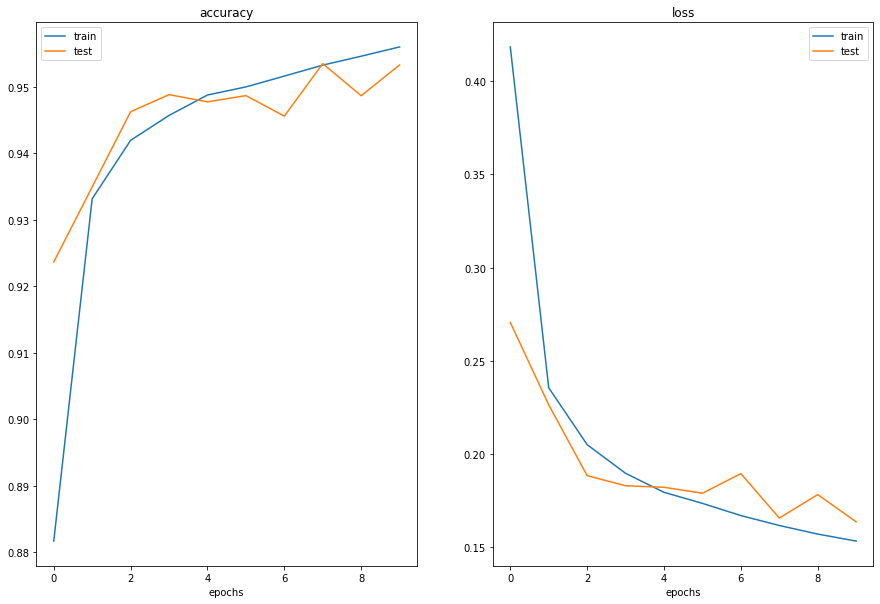

In [40]:
acc_loss_plot(log)

In [41]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

9312/9312 [==============================] - 11s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11063
           1       0.92      0.94      0.93      6995
           2       0.97      0.97      0.97     18667
           3       0.78      0.97      0.87      8090
           4       0.96      0.94      0.95      9226
           5       0.95      0.92      0.93       932
           6       0.95      0.88      0.92      4579
           7       0.96      0.88      0.92      5752
           8       0.96      0.90      0.93       883
           9       0.90      0.95      0.93      6825
          10       0.94      0.86      0.90      4471
          11       0.94      0.98      0.96      9267
          12       0.96      0.97      0.97      9849
          13       0.96      0.94      0.95     15254
          14       0.99      0.96      0.97     46196
          15       0.97      0.98      0.98     15473
       

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                23550     
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dense_14 (Dense)            (None, 26)                806       
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trainable params: 0
_________________________________________________________________


In [43]:
MOMENTUM = 0.98

In [44]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM, nesterov=False, name='SGD')

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(26, activation=SOFTMAX)
])

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.6588 - accuracy: 0.8239 - val_loss: 0.4863 - val_accuracy: 0.8740
Epoch 2/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.5248 - accuracy: 0.8657 - val_loss: 0.5447 - val_accuracy: 0.8643
Epoch 3/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.4925 - accuracy: 0.8764 - val_loss: 0.5147 - val_accuracy: 0.8722
Epoch 4/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.4793 - accuracy: 0.8814 - val_loss: 0.4618 - val_accuracy: 0.8874
Epoch 5/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.4833 - accuracy: 0.8835 - val_loss: 0.4625 - val_accuracy: 0.8898
Epoch 6/10
9312/9312 [==============================] - 18s 2ms/step - loss: 0.4709 - accuracy: 0.8874 - val_loss: 0.5261 - val_accuracy: 0.8752
Epoch 7/10
9312/9312 [==============================] - 17s 2ms/step - loss: 0.4816 - accuracy: 0.8858 - val_loss: 0.5447 - val_ac

<Figure size 432x288 with 0 Axes>

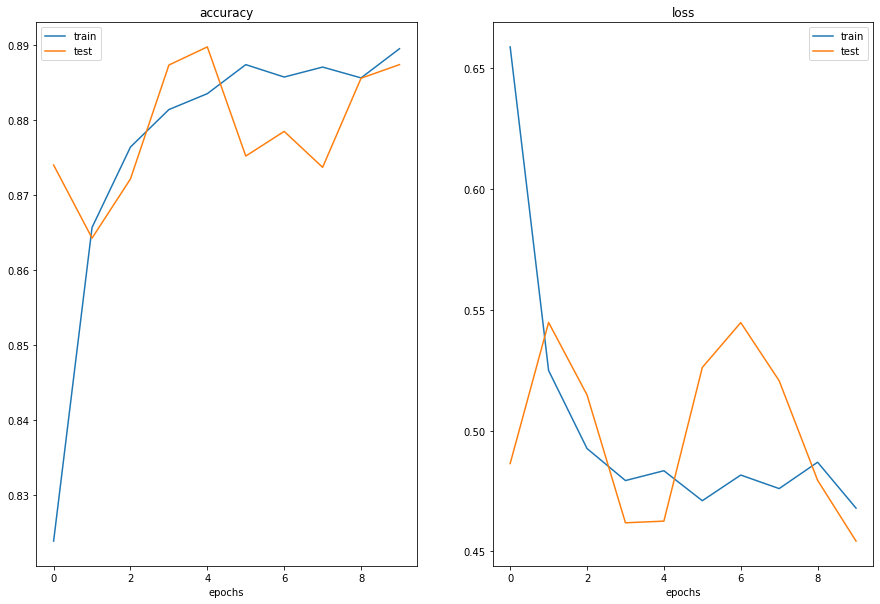

In [46]:
acc_loss_plot(log)

In [47]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

9312/9312 [==============================] - 11s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     11063
           1       0.93      0.72      0.81      6995
           2       0.95      0.89      0.92     18667
           3       0.84      0.69      0.76      8090
           4       0.78      0.83      0.80      9226
           5       0.88      0.87      0.88       932
           6       0.75      0.82      0.78      4579
           7       0.79      0.79      0.79      5752
           8       0.93      0.62      0.74       883
           9       0.54      0.92      0.68      6825
          10       0.69      0.80      0.74      4471
          11       0.92      0.92      0.92      9267
          12       0.93      0.88      0.90      9849
          13       0.79      0.88      0.83     15254
          14       0.93      0.97      0.95     46196
          15       0.95      0.93      0.94     15473
       

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                23550     
                                                                 
 dense_16 (Dense)            (None, 30)                930       
                                                                 
 dense_17 (Dense)            (None, 26)                806       
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trainable params: 0
_________________________________________________________________


**Using Adam optimizer**

In [28]:
adam_optimizer = tf.keras.optimizers.Adam()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(26, activation=SOFTMAX)
])

model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/10
9312/9312 [==============================] - 37s 4ms/step - loss: 1.9407 - accuracy: 0.5076 - val_loss: 1.1439 - val_accuracy: 0.6749
Epoch 2/10
9312/9312 [==============================] - 33s 3ms/step - loss: 1.0031 - accuracy: 0.7140 - val_loss: 0.9072 - val_accuracy: 0.7410
Epoch 3/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.8001 - accuracy: 0.7671 - val_loss: 0.7294 - val_accuracy: 0.7906
Epoch 4/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.6877 - accuracy: 0.8016 - val_loss: 0.6796 - val_accuracy: 0.8050
Epoch 5/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.6584 - accuracy: 0.8099 - val_loss: 0.6607 - val_accuracy: 0.8104
Epoch 6/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.6448 - accuracy: 0.8159 - val_loss: 0.6445 - val_accuracy: 0.8202
Epoch 7/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.6375 - accuracy: 0.8191 - val_loss: 0.6970 - val_ac

<Figure size 432x288 with 0 Axes>

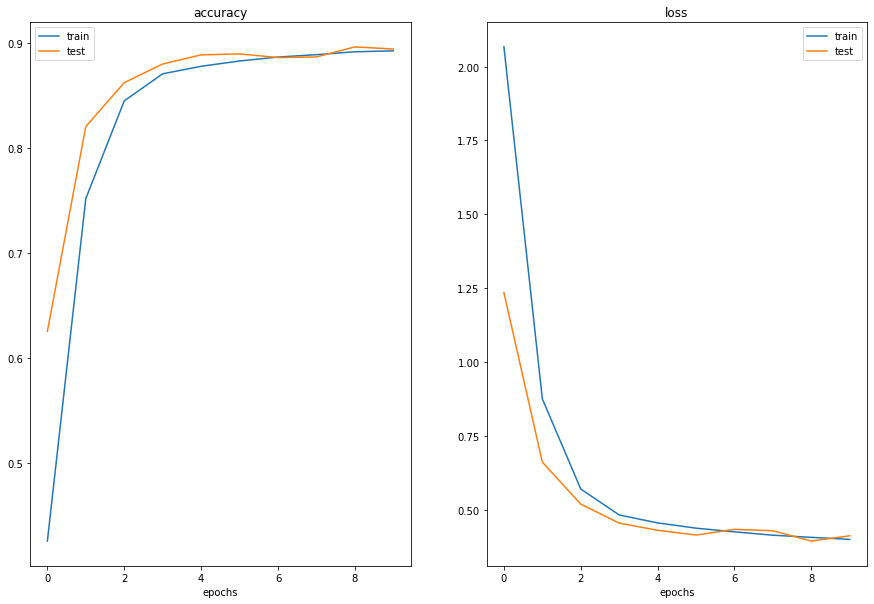

In [15]:
acc_loss_plot(log)

In [16]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

8730/8730 [==============================] - 13s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     10413
           1       0.81      0.83      0.82      6548
           2       0.94      0.93      0.93     17458
           3       0.83      0.78      0.81      7630
           4       0.87      0.80      0.83      8637
           5       0.88      0.78      0.83       879
           6       0.88      0.60      0.71      4311
           7       0.72      0.68      0.70      5400
           8       0.96      0.24      0.39       820
           9       0.86      0.82      0.84      6401
          10       0.78      0.81      0.79      4182
          11       0.97      0.91      0.94      8730
          12       0.92      0.84      0.88      9273
          13       0.75      0.92      0.82     14339
          14       0.94      0.97      0.96     43227
          15       0.92      0.95      0.94     14443
       

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 26)                806       
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trainable params: 0
_________________________________________________________________


### **Second Section) Impact on the number of Epoch:**

In [22]:
EPOCHS = 20

In [23]:
adam_optimizer = tf.keras.optimizers.Adam()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(26, activation=SOFTMAX)
])

model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/20
9312/9312 [==============================] - 25s 3ms/step - loss: 0.4362 - accuracy: 0.8799 - val_loss: 0.2726 - val_accuracy: 0.9238
Epoch 2/20
9312/9312 [==============================] - 19s 2ms/step - loss: 0.2434 - accuracy: 0.9327 - val_loss: 0.2115 - val_accuracy: 0.9410
Epoch 3/20
9312/9312 [==============================] - 19s 2ms/step - loss: 0.2066 - accuracy: 0.9426 - val_loss: 0.2062 - val_accuracy: 0.9414
Epoch 4/20
9312/9312 [==============================] - 19s 2ms/step - loss: 0.1867 - accuracy: 0.9484 - val_loss: 0.1798 - val_accuracy: 0.9507
Epoch 5/20
9312/9312 [==============================] - 19s 2ms/step - loss: 0.1753 - accuracy: 0.9506 - val_loss: 0.1752 - val_accuracy: 0.9515
Epoch 6/20
9312/9312 [==============================] - 19s 2ms/step - loss: 0.1668 - accuracy: 0.9534 - val_loss: 0.1753 - val_accuracy: 0.9515
Epoch 7/20
9312/9312 [==============================] - 19s 2ms/step - loss: 0.1604 - accuracy: 0.9547 - val_loss: 0.1652 - val_ac

<Figure size 432x288 with 0 Axes>

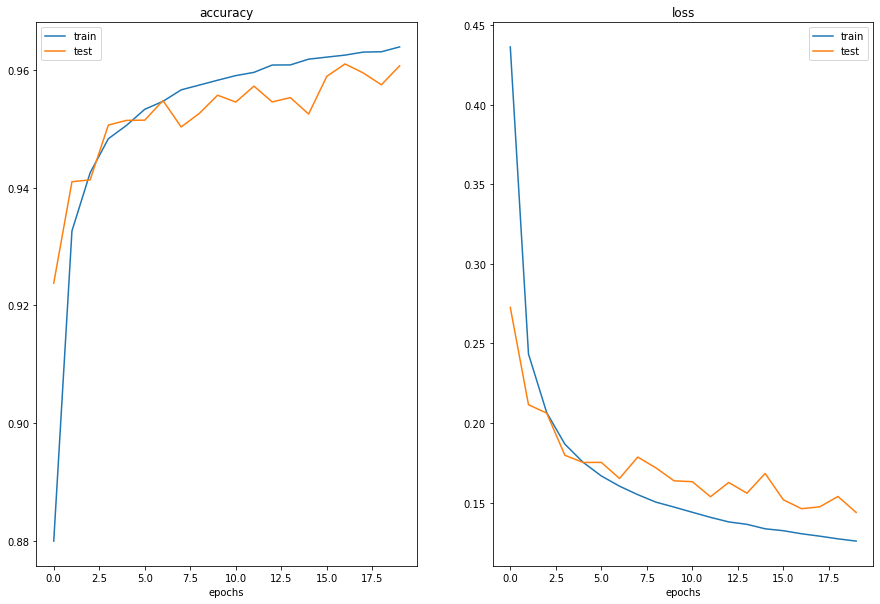

In [25]:
acc_loss_plot(log)

In [26]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

9312/9312 [==============================] - 11s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     11063
           1       0.92      0.96      0.94      6995
           2       0.97      0.98      0.97     18667
           3       0.89      0.95      0.92      8090
           4       0.98      0.93      0.95      9226
           5       0.92      0.95      0.93       932
           6       0.93      0.94      0.94      4579
           7       0.92      0.94      0.93      5752
           8       0.88      0.96      0.92       883
           9       0.95      0.94      0.95      6825
          10       0.91      0.94      0.92      4471
          11       0.96      0.98      0.97      9267
          12       0.95      0.98      0.97      9849
          13       0.98      0.94      0.96     15254
          14       0.99      0.98      0.98     46196
          15       0.97      0.98      0.98     15473
       

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                23550     
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 26)                806       
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trainable params: 0
_________________________________________________________________


### **Third Section) Impact of Loss Function:**

In [17]:
EPOCHS = 10

In [30]:
adam_optimizer = tf.keras.optimizers.Adam()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_dim=INPUT_DIM, activation=RELU),
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dense(26, activation=SOFTMAX)
])

model.compile(optimizer=adam_optimizer, loss='mse', metrics=['accuracy'])

In [34]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0291 - accuracy: 0.6216 - val_loss: 0.0247 - val_accuracy: 0.6784
Epoch 2/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.0243 - accuracy: 0.6844 - val_loss: 0.0238 - val_accuracy: 0.6902
Epoch 3/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.0258 - accuracy: 0.6639 - val_loss: 0.0241 - val_accuracy: 0.6871
Epoch 4/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0244 - accuracy: 0.6822 - val_loss: 0.0263 - val_accuracy: 0.6576
Epoch 5/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.0233 - accuracy: 0.6971 - val_loss: 0.0236 - val_accuracy: 0.6928
Epoch 6/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.0236 - accuracy: 0.6935 - val_loss: 0.0240 - val_accuracy: 0.6884
Epoch 7/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.0230 - accuracy: 0.7008 - val_loss: 0.0222 - val_ac

<Figure size 432x288 with 0 Axes>

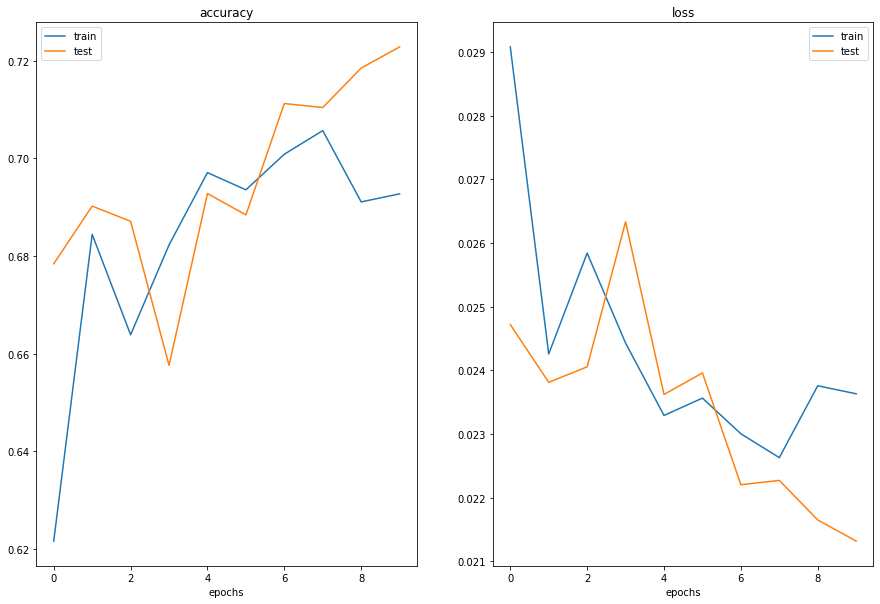

In [35]:
acc_loss_plot(log)

In [38]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

9312/9312 [==============================] - 13s 1ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.65      0.69     11063
           1       0.00      0.00      0.00      6995
           2       0.93      0.77      0.84     18667
           3       0.63      0.68      0.65      8090
           4       0.39      0.80      0.52      9226
           5       0.00      0.00      0.00       932
           6       0.31      0.73      0.43      4579
           7       0.00      0.00      0.00      5752
           8       0.00      0.00      0.00       883
           9       0.63      0.44      0.52      6825
          10       0.68      0.30      0.41      4471
          11       0.91      0.77      0.83      9267
          12       0.77      0.83      0.80      9849
          13       0.51      0.82      0.62     15254
          14       0.91      0.89      0.90     46196
          15       0.89      0.76      0.82     15473
          16       0.00      0.00      0.00      4653
          17       0.58    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2328/2328 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      2806
           1       0.00      0.00      0.00      1673
           2       0.94      0.77      0.84      4742
           3       0.64      0.69      0.67      2044
           4       0.38      0.81      0.52      2214
           5       0.00      0.00      0.00       231
           6       0.31      0.73      0.44      1183
           7       0.00      0.00      0.00      1466
           8       0.00      0.00      0.00       237
           9       0.62      0.42      0.50      1668
          10       0.71      0.29      0.41      1132
          11       0.92      0.79      0.85      2319
          12       0.76      0.84      0.80      2487
          13       0.50      0.81      0.62      3756
          14       0.91      0.89      0.90     11629
          15       0.89      0.77      0.82      3868
          16       0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                23550     
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dense_11 (Dense)            (None, 26)                806       
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trainable params: 0
_________________________________________________________________


### **Fourth Section) Impact of Regularization:**

**1. Regularization L2**

In [25]:
adam_optimizer = tf.keras.optimizers.Adam()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=RELU, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(30, activation=RELU, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(26, activation=SOFTMAX, kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])

model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/10
9312/9312 [==============================] - 21s 2ms/step - loss: 0.4492 - accuracy: 0.8839 - val_loss: 0.2986 - val_accuracy: 0.9251
Epoch 2/10
9312/9312 [==============================] - 21s 2ms/step - loss: 0.2770 - accuracy: 0.9332 - val_loss: 0.2525 - val_accuracy: 0.9399
Epoch 3/10
9312/9312 [==============================] - 20s 2ms/step - loss: 0.2473 - accuracy: 0.9421 - val_loss: 0.2289 - val_accuracy: 0.9479
Epoch 4/10
9312/9312 [==============================] - 21s 2ms/step - loss: 0.2308 - accuracy: 0.9474 - val_loss: 0.2474 - val_accuracy: 0.9430
Epoch 5/10
9312/9312 [==============================] - 20s 2ms/step - loss: 0.2200 - accuracy: 0.9507 - val_loss: 0.2198 - val_accuracy: 0.9503
Epoch 6/10
9312/9312 [==============================] - 20s 2ms/step - loss: 0.2130 - accuracy: 0.9528 - val_loss: 0.2214 - val_accuracy: 0.9501
Epoch 7/10
9312/9312 [==============================] - 20s 2ms/step - loss: 0.2078 - accuracy: 0.9540 - val_loss: 0.2083 - val_ac

<Figure size 432x288 with 0 Axes>

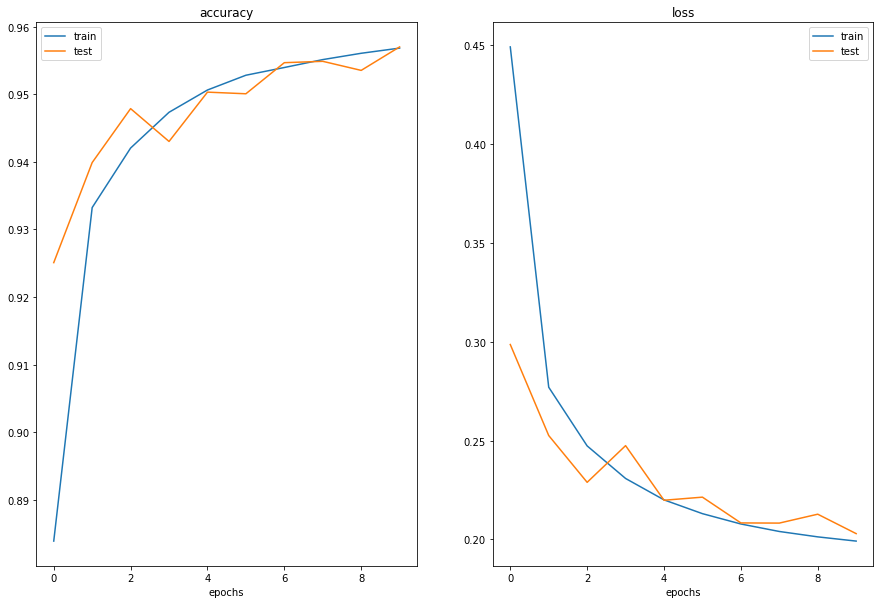

In [27]:
acc_loss_plot(log)

In [28]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

9312/9312 [==============================] - 11s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11063
           1       0.92      0.94      0.93      6995
           2       0.97      0.97      0.97     18667
           3       0.95      0.86      0.90      8090
           4       0.97      0.92      0.94      9226
           5       0.96      0.87      0.91       932
           6       0.91      0.93      0.92      4579
           7       0.92      0.90      0.91      5752
           8       0.97      0.89      0.93       883
           9       0.93      0.92      0.93      6825
          10       0.92      0.89      0.90      4471
          11       0.98      0.96      0.97      9267
          12       0.96      0.97      0.96      9849
          13       0.95      0.95      0.95     15254
          14       0.97      0.99      0.98     46196
          15       0.98      0.97      0.97     15473
       

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                23550     
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dense_14 (Dense)            (None, 26)                806       
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trainable params: 0
_________________________________________________________________


**2. Dropout**

In [15]:
adam_optimizer = tf.keras.optimizers.Adam()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(30, activation=RELU),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(26, activation=SOFTMAX),
    tf.keras.layers.Dropout(0.1)
])

model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
log = model.fit(x=xx_train, y=yy_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(xx_test, yy_test))

Epoch 1/10
9312/9312 [==============================] - 37s 4ms/step - loss: nan - accuracy: 0.0372 - val_loss: nan - val_accuracy: 0.0377
Epoch 2/10
9312/9312 [==============================] - 32s 3ms/step - loss: nan - accuracy: 0.0371 - val_loss: nan - val_accuracy: 0.0377
Epoch 3/10
9312/9312 [==============================] - 35s 4ms/step - loss: nan - accuracy: 0.0371 - val_loss: nan - val_accuracy: 0.0377
Epoch 4/10
9312/9312 [==============================] - 35s 4ms/step - loss: nan - accuracy: 0.0371 - val_loss: nan - val_accuracy: 0.0377
Epoch 5/10
9312/9312 [==============================] - 36s 4ms/step - loss: nan - accuracy: 0.0371 - val_loss: nan - val_accuracy: 0.0377
Epoch 6/10
9312/9312 [==============================] - 34s 4ms/step - loss: nan - accuracy: 0.0371 - val_loss: nan - val_accuracy: 0.0377
Epoch 7/10
9312/9312 [==============================] - 35s 4ms/step - loss: nan - accuracy: 0.0371 - val_loss: nan - val_accuracy: 0.0377
Epoch 8/10
9312/9312 [=====

<Figure size 432x288 with 0 Axes>

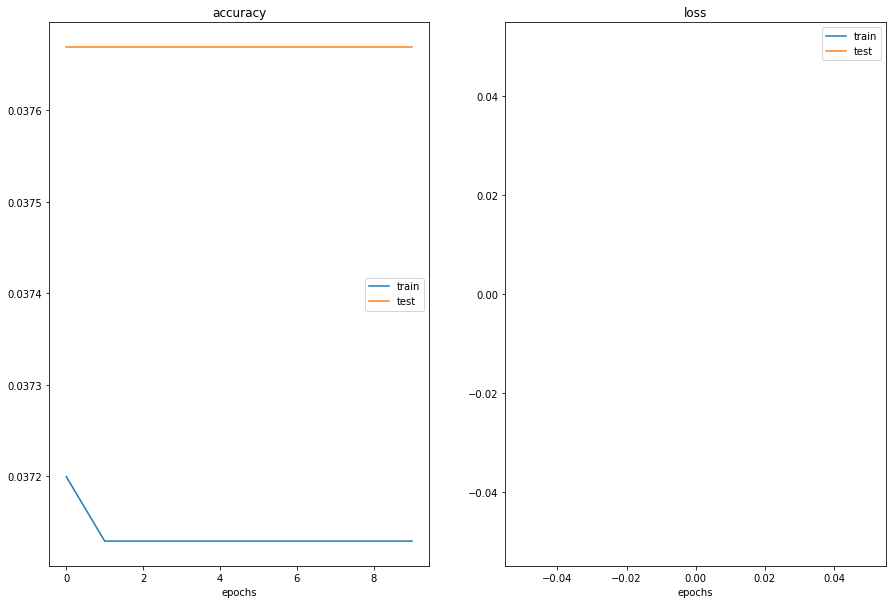

In [18]:
acc_loss_plot(log)

In [19]:
print("Train Report: \n")
criterion_report(xx_train, yy_train)
print("\n\n\nTest Report: \n")
criterion_report(xx_test, yy_test)

Train Report: 

9312/9312 [==============================] - 13s 1ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.04      1.00      0.07     11063
           1       0.00      0.00      0.00      6995
           2       0.00      0.00      0.00     18667
           3       0.00      0.00      0.00      8090
           4       0.00      0.00      0.00      9226
           5       0.00      0.00      0.00       932
           6       0.00      0.00      0.00      4579
           7       0.00      0.00      0.00      5752
           8       0.00      0.00      0.00       883
           9       0.00      0.00      0.00      6825
          10       0.00      0.00      0.00      4471
          11       0.00      0.00      0.00      9267
          12       0.00      0.00      0.00      9849
          13       0.00      0.00      0.00     15254
          14       0.00      0.00      0.00     46196
          15       0.00      0.00      0.00     15473
          16       0.00      0.00      0.00      4653
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                23550     
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 26)                806       
                                                                 
 dropout_5 (Dropout)         (None, 26)                0         
                                                                 
Total params: 25,286
Trainable params: 25,286
Non-trai

In [ ]:
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb